In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import json
%matplotlib inline


In [3]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # Setup map and marker
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=c1)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

In [4]:
dataset = pd.read_json('satcat100k.json')

In [5]:
dataset.head()

,INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,...,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,2021-017BN,47782,ROCKET BODY,FALCON 9 R/B,US,2021-03-04,AFETR,2021-03-26,87.28,53.03,...,0,LARGE,7634,2021,17,BN,Y,FALCON 9 R/B,2021-017BN,47782
1,2020-063C,46391,DEBRIS,CZ-2F DEB,PRC,2020-09-04,JSC,2021-03-24,88.41,49.88,...,0,SMALL,7633,2020,63,C,Y,CZ-2F DEB,2020-063C,46391
2,2020-006BF,45097,PAYLOAD,STARLINK-1175,US,2020-01-29,AFETR,2021-03-19,88.00,52.96,...,0,LARGE,7631,2020,6,BF,Y,STARLINK-1175,2020-006BF,45097
3,1998-067QB,44304,DEBRIS,ISS DEB,CIS,1998-11-20,TTMTR,2021-03-18,87.97,51.62,...,0,MEDIUM,7632,1998,67,QB,Y,ISS DEB,1998-067QB,44304
4,1993-036BTE,38214,DEBRIS,COSMOS 2251 DEB,CIS,1993-06-16,PKMTR,2021-03-16,91.94,74.02,...,0,SMALL,7633,1993,36,BTE,Y,COSMOS 2251 DEB,1993-036BTE,38214


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47968 entries, 0 to 47967
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INTLDES        47968 non-null  object 
 1   NORAD_CAT_ID   47968 non-null  int64  
 2   OBJECT_TYPE    47968 non-null  object 
 3   SATNAME        47968 non-null  object 
 4   COUNTRY        47968 non-null  object 
 5   LAUNCH         47968 non-null  object 
 6   SITE           47968 non-null  object 
 7   DECAY          25355 non-null  object 
 8   PERIOD         47063 non-null  float64
 9   INCLINATION    47063 non-null  float64
 10  APOGEE         47063 non-null  float64
 11  PERIGEE        47063 non-null  float64
 12  COMMENT        891 non-null    object 
 13  COMMENTCODE    2689 non-null   float64
 14  RCSVALUE       47968 non-null  int64  
 15  RCS_SIZE       37931 non-null  object 
 16  FILE           47968 non-null  int64  
 17  LAUNCH_YEAR    47968 non-null  int64  
 18  LAUNCH

In [7]:
dataset.describe()

,NORAD_CAT_ID,PERIOD,INCLINATION,APOGEE,PERIGEE,COMMENTCODE,RCSVALUE,FILE,LAUNCH_YEAR,LAUNCH_NUM,OBJECT_NUMBER
count,47968.000000,47063.000000,47063.000000,47063.000000,47063.000000,2689.000000,47968.0,47968.000000,47968.000000,47968.000000,47968.000000
mean,23984.501668,192.887099,69.597977,4190.485456,1993.158660,3.584976,0.0,5625.967624,1990.028936,47.810353,23984.501668
std,13847.316082,692.621308,25.430927,14201.356898,7060.192735,1.422454,0.0,3193.938453,16.081892,29.939163,13847.316082
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,1957.000000,0.000000,1.000000
25%,11992.750000,89.240000,53.050000,269.000000,191.000000,3.000000,0.0,5942.000000,1977.000000,25.000000,11992.750000
50%,23984.500000,94.490000,71.280000,538.000000,380.000000,3.000000,0.0,7337.000000,1990.000000,42.000000,23984.500000
75%,35976.250000,103.170000,96.875000,1005.000000,760.000000,5.000000,0.0,7631.000000,1999.000000,70.000000,35976.250000
max,47976.000000,95687.680000,150.940000,672548.000000,265679.000000,5.000000,0.0,7634.000000,2021.000000,129.000000,47976.000000


# Lets do some data explorartion

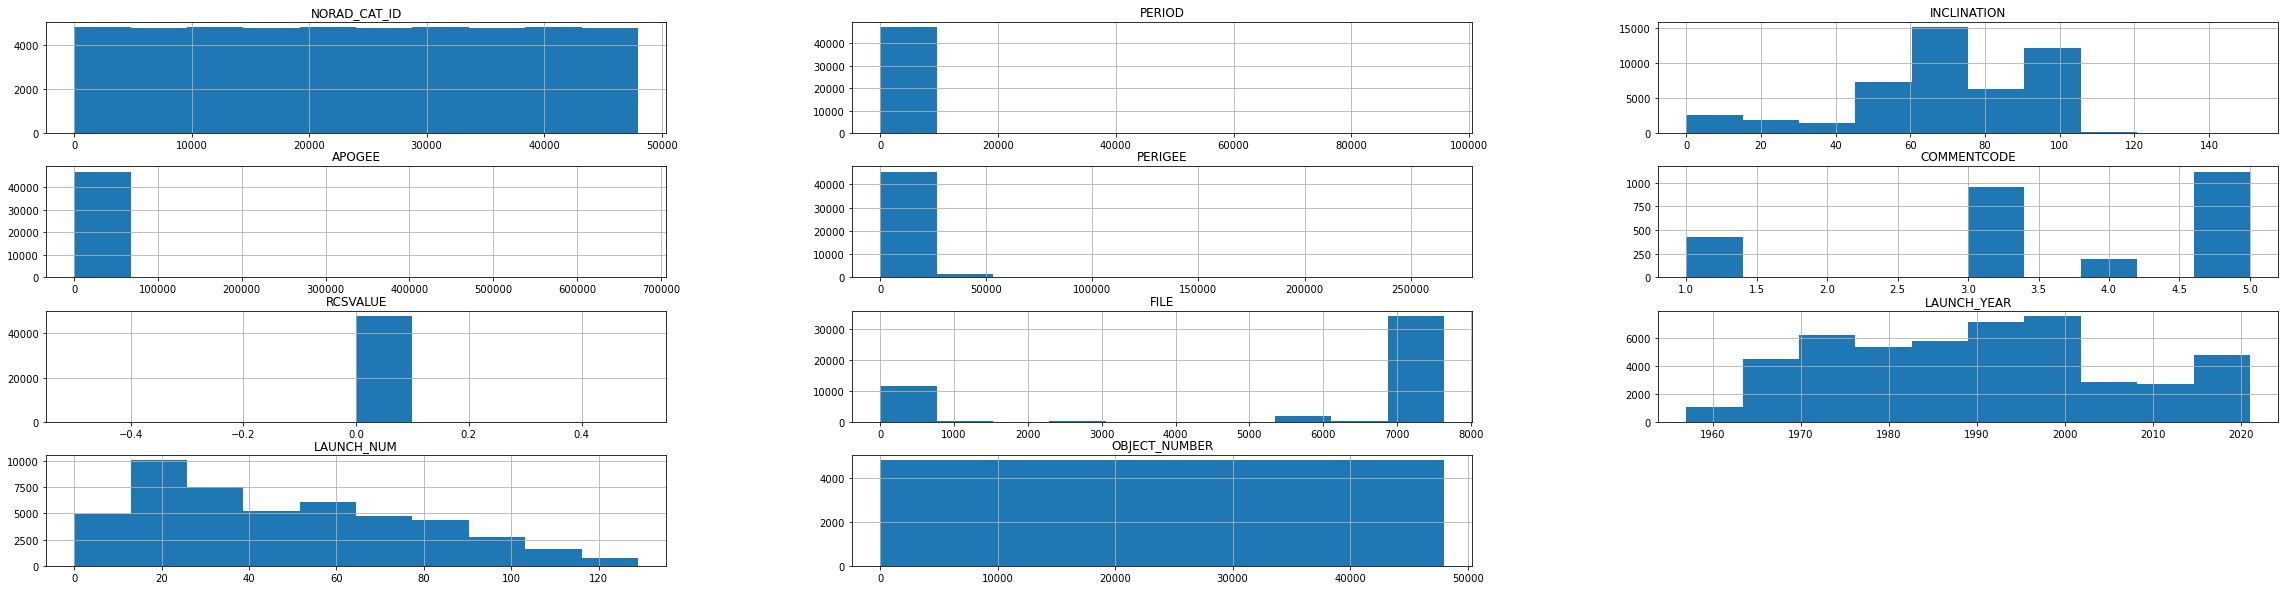

In [8]:
dataset.hist(figsize=(40,10))
plt.show()

In [10]:
corr_mat = dataset.corr()

## Which Countries have the most reported objects?

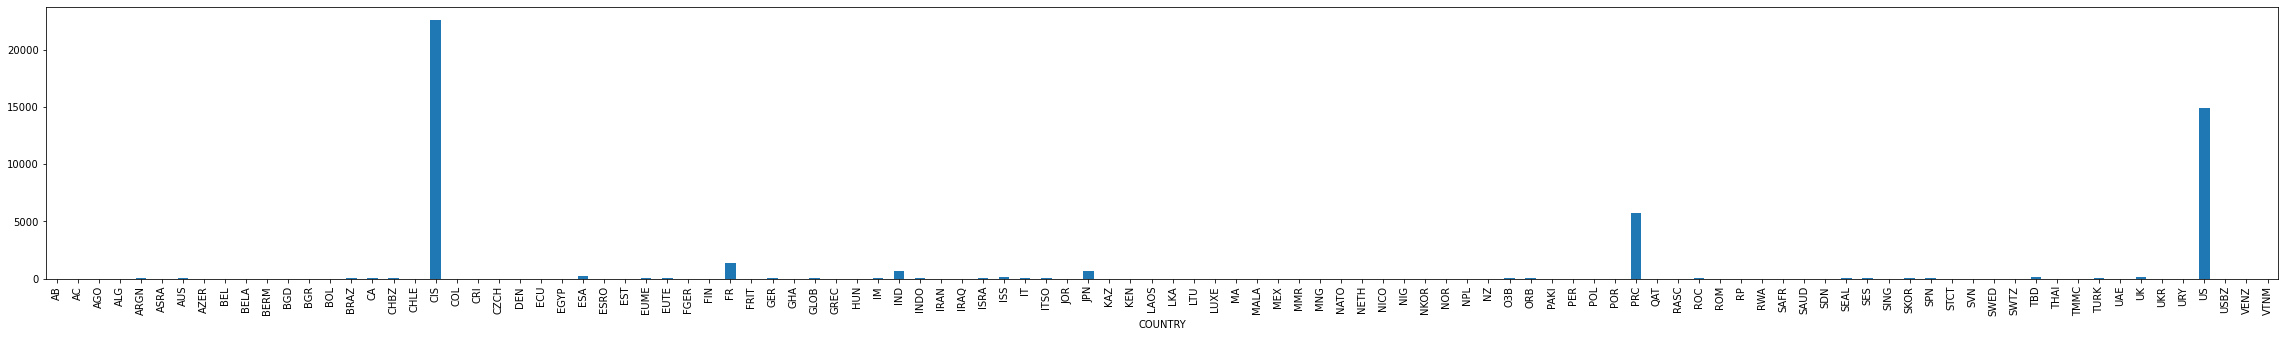

In [11]:
dfcountry = dataset.groupby(['COUNTRY'])['COUNTRY'].count()
dfcountry.plot(kind='bar')
plt.rcParams['figure.figsize'] = (50, 5)

In [12]:
dataset['COUNTRY'].value_counts()

CIS     22604
US      14872
PRC      5759
FR       1327
JPN       710
        ...  
CRI         1
MMR         1
NICO        1
LAOS        1
RWA         1
Name: COUNTRY, Length: 106, dtype: int64

Looking at the figure above, the Commenwealth of Independent states (CIS), US, and PRC respectivly, have the most reported objects.

<AxesSubplot:xlabel='OBJECT_TYPE'>

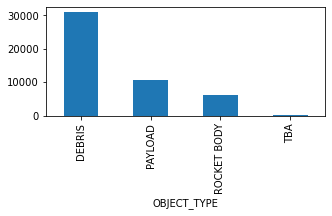

In [13]:
dfobjects = dataset.groupby(['OBJECT_TYPE'])['OBJECT_TYPE'].count()
dfobjects.plot(kind='bar', figsize=(5,2))

## Let's get a breakdown of the objects

In [14]:
dataset['OBJECT_TYPE'].value_counts()

DEBRIS         30974
PAYLOAD        10559
ROCKET BODY     6228
TBA              207
Name: OBJECT_TYPE, dtype: int64

<AxesSubplot:xlabel='RCS_SIZE'>

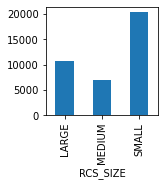

In [15]:
dfobjects = dataset.groupby(['RCS_SIZE'])['RCS_SIZE'].count()
dfobjects.plot(kind='bar', figsize=(2,2))

It looks like most of the objects are small and debris, which may pose issue with navigating around the debris for spacecraft.

# Lets see if we can gain some insights on the data by clustering

In [16]:
dataset['LAUNCH_PIECE'].value_counts()

A      5665
B      5346
C      3408
D      2641
E      1865
       ... 
EJR       1
CCS       1
DZT       1
CVY       1
CKQ       1
Name: LAUNCH_PIECE, Length: 3533, dtype: int64

In [17]:
dataset['SITE'].value_counts()

TTMTR    12192
PKMTR    11523
AFWTR     7527
AFETR     5883
TSC       4608
FRGUI     1911
SRI       1017
JSC        651
XSC        614
TNSTA      465
KYMTR      404
WLPIS      233
KSCUT      157
RLLC       137
OREN       115
VOSTO      113
SEAL        69
ERAS        62
WRAS        57
HGSTR       48
WSC         39
YSLA        26
SVOB        20
KODAK       19
YAVNE       19
SNMLP       17
SADOL       11
SEM          8
KWAJL        7
YUN          6
WOMRA        4
CAS          2
NSC          2
SMTS         2
Name: SITE, dtype: int64

In [19]:
dataset['DECAY'].value_counts()

1976-08-02    150
1973-05-07     93
1975-09-09     75
1976-08-05     52
1977-01-20     47
             ... 
2002-09-19      1
2005-09-09      1
1967-07-20      1
1975-01-21      1
1996-02-03      1
Name: DECAY, Length: 13211, dtype: int64

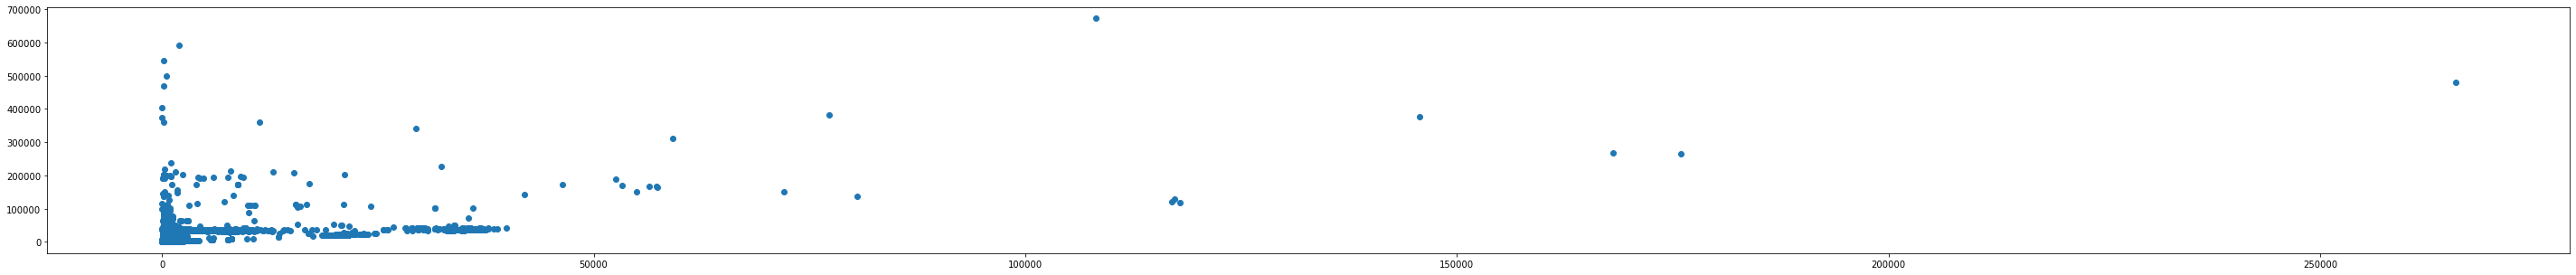

In [20]:
plt.scatter(dataset['PERIGEE'], dataset['APOGEE'])

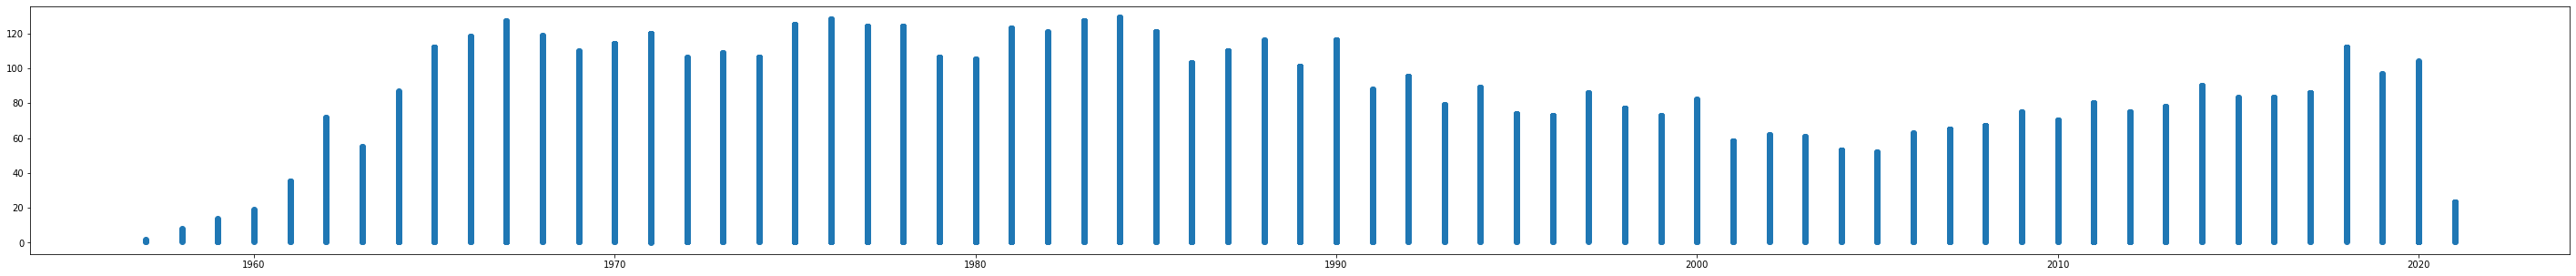

In [21]:
plt.scatter(dataset['LAUNCH_YEAR'],dataset['LAUNCH_NUM'])

# TIme to prepare the dataset and do some trimming

In [22]:
# drop some the columns that have no values or may not be relevant
df = dataset.drop(['NORAD_CAT_ID','COMMENT','COMMENTCODE','RCSVALUE','FILE','LAUNCH_NUM'], axis=1)
df['OBJECT_TYPE'].dropna(inplace=True)
df.dropna(inplace=True)
df.dropna()
df.head()

,INTLDES,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,LAUNCH_YEAR,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,2021-017BN,ROCKET BODY,FALCON 9 R/B,US,2021-03-04,AFETR,2021-03-26,87.28,53.03,144.0,135.0,LARGE,2021,BN,Y,FALCON 9 R/B,2021-017BN,47782
1,2020-063C,DEBRIS,CZ-2F DEB,PRC,2020-09-04,JSC,2021-03-24,88.41,49.88,201.0,191.0,SMALL,2020,C,Y,CZ-2F DEB,2020-063C,46391
2,2020-006BF,PAYLOAD,STARLINK-1175,US,2020-01-29,AFETR,2021-03-19,88.00,52.96,183.0,169.0,LARGE,2020,BF,Y,STARLINK-1175,2020-006BF,45097
3,1998-067QB,DEBRIS,ISS DEB,CIS,1998-11-20,TTMTR,2021-03-18,87.97,51.62,178.0,169.0,MEDIUM,1998,QB,Y,ISS DEB,1998-067QB,44304
4,1993-036BTE,DEBRIS,COSMOS 2251 DEB,CIS,1993-06-16,PKMTR,2021-03-16,91.94,74.02,380.0,359.0,SMALL,1993,BTE,Y,COSMOS 2251 DEB,1993-036BTE,38214


In [23]:
df.columns

Index(['INTLDES', 'OBJECT_TYPE', 'SATNAME', 'COUNTRY', 'LAUNCH', 'SITE',
       'DECAY', 'PERIOD', 'INCLINATION', 'APOGEE', 'PERIGEE', 'RCS_SIZE',
       'LAUNCH_YEAR', 'LAUNCH_PIECE', 'CURRENT', 'OBJECT_NAME', 'OBJECT_ID',
       'OBJECT_NUMBER'],
      dtype='object')

In [91]:
# Lets attempt to cluster the objects based on the apogee and perigee

In [ ]:
# We can train a model to predict when an object will Decay (Regression, SVM, Decision Trees)
# Use the size, period, inclination, etc. to predict the object type

In [25]:
# Get the numerical values
debris_num = dataset.drop(['NORAD_CAT_ID','INTLDES', 'OBJECT_TYPE', 'SATNAME', 'COUNTRY', 'LAUNCH', 'SITE',
       'RCS_SIZE', 'LAUNCH_PIECE','COMMENT','COMMENTCODE','FILE','LAUNCH_NUM', 'CURRENT', 'OBJECT_NAME', 'OBJECT_ID',
       'OBJECT_NUMBER', 'RCSVALUE','DECAY'], axis=1)
debris_num.dropna(inplace=True)
debris_num.head()

,PERIOD,INCLINATION,APOGEE,PERIGEE,LAUNCH_YEAR
0,87.28,53.03,144.0,135.0,2021
1,88.41,49.88,201.0,191.0,2020
2,88.00,52.96,183.0,169.0,2020
3,87.97,51.62,178.0,169.0,1998
4,91.94,74.02,380.0,359.0,1993


In [42]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
launch = pd.to_datetime(debris_num['LAUNCH_YEAR'], format='%Y').apply(lambda x: x.toordinal())
ap = np.array(debris_num['APOGEE']).reshape(-1,1)
ap = std_sc.fit_transform(ap)
pe = np.array(debris_num['PERIGEE']).reshape(-1,1)
pe = std_sc.fit_transform(pe)
inc = np.array(debris_num['INCLINATION']).reshape(-1,1)
inc = std_sc.fit_transform(inc)
per = np.array(debris_num['PERIOD']).reshape(-1,1)
per = std_sc.fit_transform(per)
# reg = len(np.concatenate([per, inc, pe, ap], axis=1))
debris_reg = pd.concat([pd.DataFrame(per, columns=['PERIOD']), pd.DataFrame(inc, columns=['INCLINATION']), 
                 pd.DataFrame(pe, columns=['PERIGEE']), pd.DataFrame(ap, columns=['APOGEE']), pd.DataFrame(launch)], axis=1)

In [33]:
# one hot encode the RCS size
from sklearn.preprocessing import OneHotEncoder
rcs_cat = dataset['RCS_SIZE']
obj_cat = dataset['OBJECT_TYPE']
obj_onehot = pd.get_dummies(obj_cat)
rcs_onehot = pd.get_dummies(rcs_cat)
encoded = pd.concat([obj_onehot, rcs_onehot], axis=1)
encoded.head()

,DEBRIS,PAYLOAD,ROCKET BODY,TBA,LARGE,MEDIUM,SMALL
0,0,0,1,0,1,0,0
1,1,0,0,0,0,0,1
2,0,1,0,0,1,0,0
3,1,0,0,0,0,1,0
4,1,0,0,0,0,0,1


In [73]:
#Format target labels
labels = pd.to_datetime(df['DECAY']).apply(lambda x: x.toordinal())


In [80]:
#Combine the categorical and numerical data and drop the NaN rows
debris_set = pd.concat([debris_reg, encoded, labels], axis=1)
debris_set_prepared = debris_set.dropna()
debris_set_prepared

,PERIOD,INCLINATION,PERIGEE,APOGEE,LAUNCH_YEAR,DEBRIS,PAYLOAD,ROCKET BODY,TBA,LARGE,MEDIUM,SMALL,DECAY
0,-0.152476,-0.651496,-0.263191,-0.284940,737791.0,0,0,1,0,1,0,0,737875.0
1,-0.150845,-0.775362,-0.255259,-0.280926,737425.0,1,0,0,0,0,0,1,737873.0
2,-0.151437,-0.654249,-0.258375,-0.282193,737425.0,0,1,0,0,1,0,0,737868.0
3,-0.151480,-0.706941,-0.258375,-0.282545,729390.0,1,0,0,0,0,1,0,737867.0
4,-0.145748,0.173886,-0.231463,-0.268321,727564.0,1,0,0,0,0,0,1,737865.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25206,39.749651,-1.797751,-0.010787,41.405322,716241.0,0,0,1,0,0,0,1,716466.0
25294,0.810802,-1.711634,-0.190954,2.627489,715145.0,0,0,1,0,0,0,1,716056.0
25338,-0.131844,1.165209,-0.166309,-0.235437,714780.0,0,1,0,0,1,0,0,715606.0
25352,-0.123788,-1.736014,-0.254551,-0.154669,714415.0,0,1,0,0,0,0,1,714883.0


In [81]:
# Split the data
from sklearn.model_selection import train_test_split
y = debris_set_prepared.pop('DECAY')
x_train, x_test, y_train, y_test = train_test_split(debris_set_prepared, y, test_size=.3, random_state=42)

In [90]:
# import the metrics
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score


In [91]:
# show scores
def disp_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'std: {scores.std()}')

In [87]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=200, random_state=42)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [96]:
score = cross_val_score(forest_reg, x_train, y_train, cv=10)
disp_scores(score)

Scores: [0.78795001 0.77000299 0.77151052 0.75207488 0.78207952 0.77398721
 0.78947407 0.7575478  0.76964015 0.77691736]
Mean: 0.7731184508285056
std: 0.011369413922251352


In [88]:
debris_pred = forest_reg.predict(x_test)
mse = mean_squared_error(y_test, debris_pred)
mse = np.sqrt(mse)
mse

2204.0746007970815

In [400]:
# Use k-means clustering to cluster the dataset
from sklearn import cluster

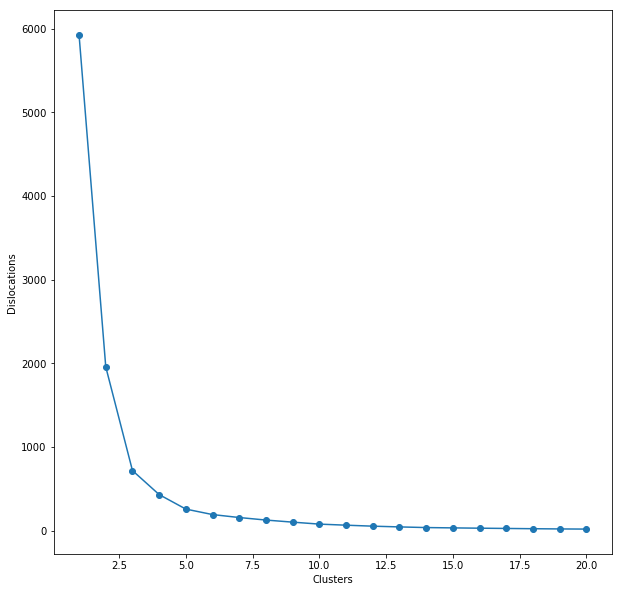

In [401]:
# Find where the number of clusters improve
distortions_obj = []
for i in range(1,21):
    km = cluster.KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0, n_jobs=-1)
    km.fit(obj_labl)
    distortions_obj.append(km.inertia_)
plt.plot(range(1,21), distortions_obj, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Dislocations')
plt.show()

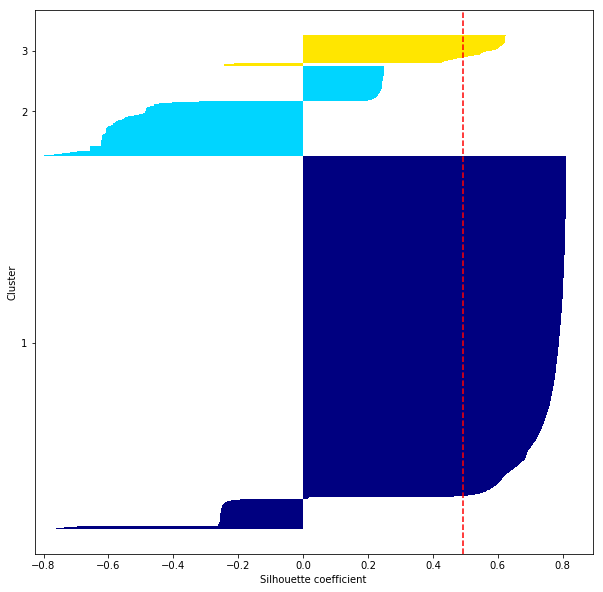

In [402]:
# create a sillouite plot
km = cluster.KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=500, random_state=0, n_jobs=-1)
y_km = km.fit_predict(obj_labl)

from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(labl_data, y_km, metric='euclidean')

y_ax_low, y_ax_up = 0, 0
y_ticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_up += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_low, y_ax_up), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_ticks.append((y_ax_low + y_ax_up) / 2) 
    y_ax_low += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle="--")
plt.yticks(y_ticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

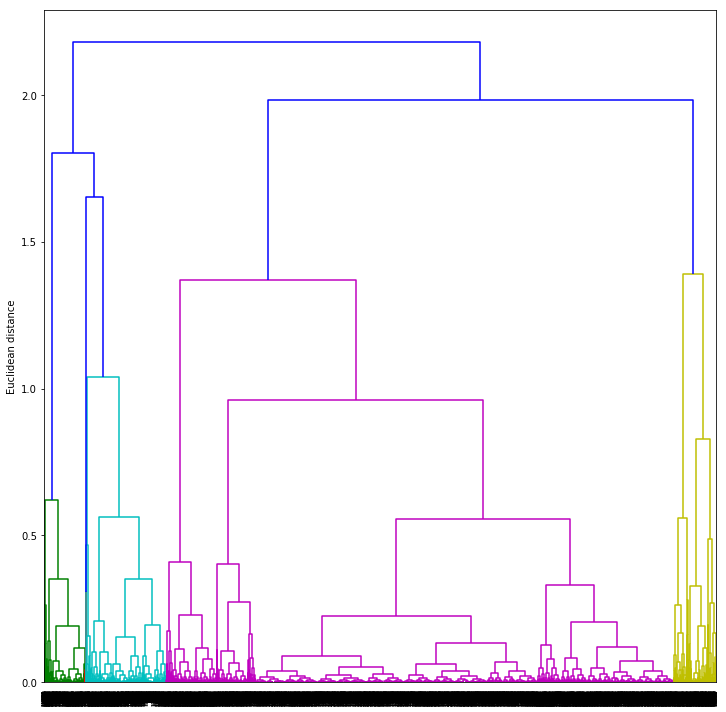

In [404]:
row_clusters = linkage(obj_labl.values,method='complete', metric='euclidean')
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [389]:
# Split into training and test data
# X = dataset.RCS_SIZE

# labl_data = pd.get_dummies(clus_data[['RCS_SIZE', 'orbit_speed']])
labl_data = pd.get_dummies(clus_data[['RCS_SIZE','orbit_speed']])

# Y = orbit_speed
labl_data.head()

,orbit_speed,RCS_SIZE_LARGE,RCS_SIZE_MEDIUM,RCS_SIZE_SMALL
0,0.875403,0,0,1
1,0.874975,0,0,1
2,1.203773,0,0,1
3,0.631864,0,0,1
4,1.357929,0,0,1


(<matplotlib.collections.PathCollection at 0x7fc5c25e6550>,)

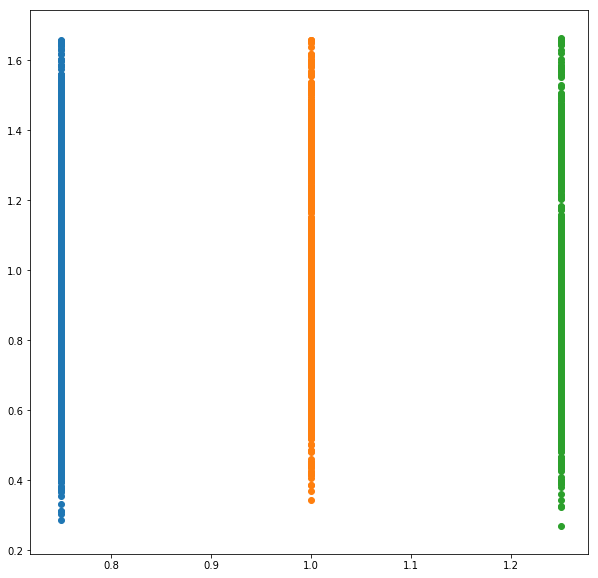

In [392]:
plt.scatter(labl_data.RCS_SIZE_SMALL[labl_data.RCS_SIZE_SMALL == 1] - .25, orbit_speed[labl_data.RCS_SIZE_SMALL == 1])
plt.scatter(labl_data.RCS_SIZE_MEDIUM[labl_data.RCS_SIZE_MEDIUM == 1], orbit_speed[labl_data.RCS_SIZE_MEDIUM == 1]),
plt.scatter(labl_data.RCS_SIZE_LARGE[labl_data.RCS_SIZE_LARGE == 1]+.25, orbit_speed[labl_data.RCS_SIZE_LARGE == 1]),


In [343]:
# Train the dataset using k-means
k_means = cluster.KMeans(n_clusters=3, random_state=0, n_jobs=-1, n_init=10, max_iter=500)
y_km = k_means.fit_predict(labl_data)


In [344]:
# plt.scatter(labl_data[y_km==0,0], labl_data[y_km==0,1], 
#            s=50, c='lightgreen', marker='s', label='cluster 1')
# plt.scatter(labl_data[y_km==1,0], labl_data[y_km==1,1], 
#            s=50, c='lightblue', marker='o', label='cluster 1')
# plt.scatter(labl_data[y_km==2,0], labl_data[y_km==2,1], 
#            s=50, c='orange', marker='v', label='cluster 1')
# plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],
#             s=50, marker='*', c='red', label='centroids')
# plt.legend()
# plt.grid()
# plt.show()

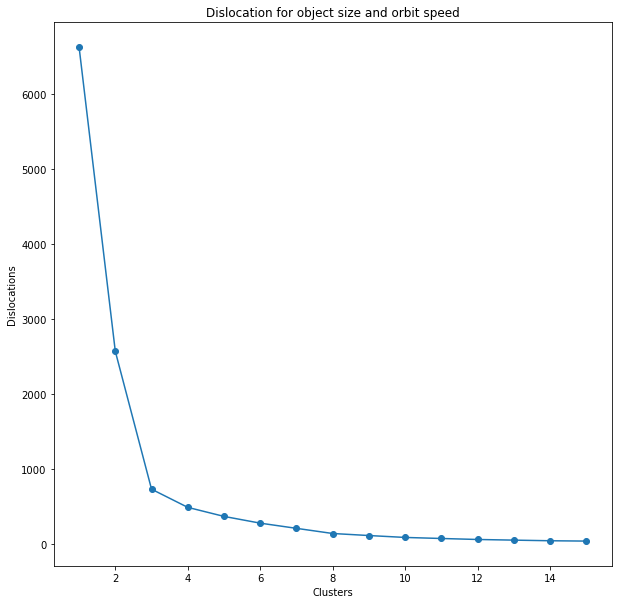

In [345]:
# Find where the number of clusters improve
distortions = []
for i in range(1,16):
    km = cluster.KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0, n_jobs=-1)
    km.fit(labl_data)
    distortions.append(km.inertia_)
plt.plot(range(1,16), distortions, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Dislocations')
plt.title('Dislocation for object size and orbit speed')
plt.show()

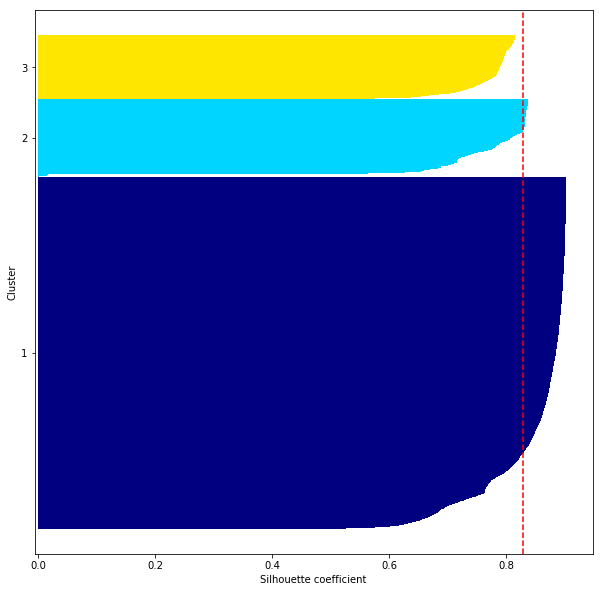

In [346]:
# create a sillouite plot
km = cluster.KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=500, random_state=0, n_jobs=-1)
y_km = km.fit_predict(labl_data)

from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(labl_data, y_km, metric='euclidean')

y_ax_low, y_ax_up = 0, 0
y_ticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_up += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_low, y_ax_up), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_ticks.append((y_ax_low + y_ax_up) / 2) 
    y_ax_low += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle="--")
plt.yticks(y_ticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

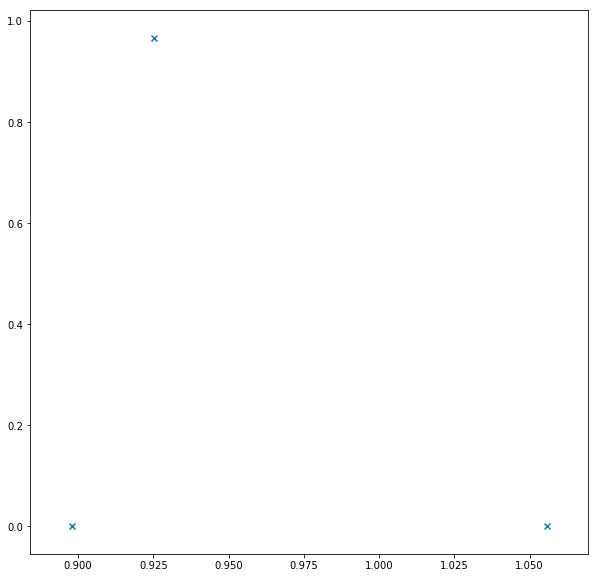

In [347]:
centroids = k_means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:,1], marker='x' )
plt.scatter(y_km[0])
plt.show()

In [ ]:
# # assignment, cdist = cluster.vq.vq(X_train, Y_train)
# pyplot.scatter(X_train['SMALL'], Y_train)
# pyplot.scatter(Y_train, X_train['MEDIUM'])
# pyplot.scatter(X_train['LARGE'], Y_train)
# pyplot.show()

In [348]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

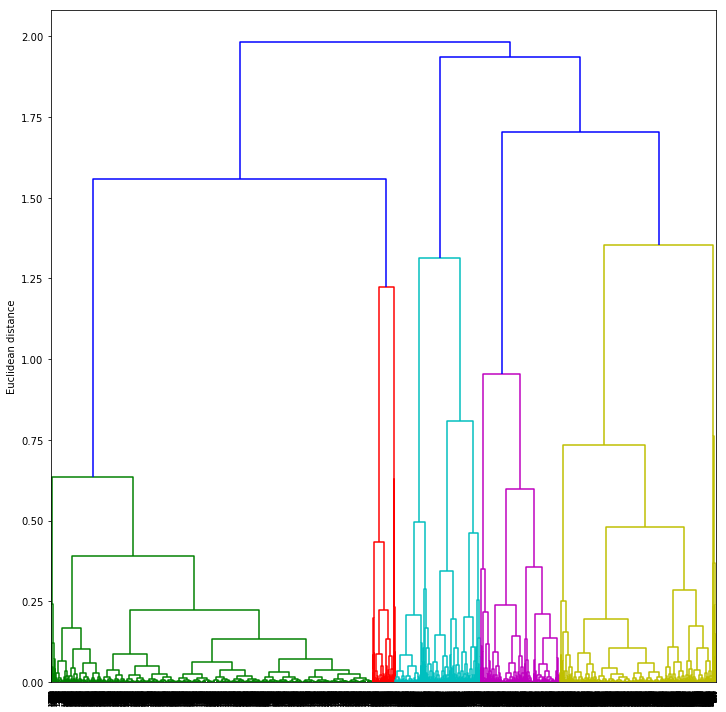

In [405]:
row_clusters = linkage(labl_data.values,method='complete', metric='euclidean')
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [350]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(labl_data)
print(labels)

[1 1 0 ..., 2 2 2]
